# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("fraudTest.csv")

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

C:\Users\mooye\AppData\Local\Temp\ipykernel_42672\2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
C:\Users\mooye\AppData\Local\Temp\ipykernel_42672\2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [7]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [9]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [10]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [13]:
over_log.score(X_test, y_test)

0.9168646080760094

In [14]:
under_log.score(X_test, y_test)

0.931020417956285

In [15]:
smote_log.score(X_test, y_test)

0.9139134816094436

In [16]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

In [17]:
# Sensitivity here in credit fraud is more important as seen from last class

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
y_true = y_test

In [20]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76191,  6850],
       [   80,   237]], dtype=int64)

In [21]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7476340694006309


In [22]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[77371,  5670],
       [   80,   237]], dtype=int64)

In [23]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7476340694006309


In [24]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75945,  7096],
       [   80,   237]], dtype=int64)

In [25]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7476340694006309


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [55]:
X

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,25,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,29.84,302,33,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,41.28,34496,53,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,60.05,54767,15,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,3.19,1126,17,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,519,7,False,False,False,False,False,True,False,False,False,False,False,False,False,False
555715,111.84,28739,9,False,False,False,False,False,False,False,True,False,False,False,False,False,False
555716,86.88,3684,15,False,False,False,False,False,False,False,True,False,False,False,False,False,False
555717,7.99,129,24,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [63]:
# Try to fix the graph
# Convert X_train to dataframe and rename 
X_train_rename = pd.DataFrame(X_train)
X_train_rename

X_train_rename.columns = X.columns

In [68]:
raw_temp = pd.concat([X_train_rename, y_train], axis =1)

In [69]:
raw_temp

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,is_fraud
0,-0.330591,-0.292015,0.664491,-0.278788,-0.27615,-0.336404,-0.190314,-0.323251,3.76265,-0.322936,-0.309553,-0.227140,-0.25644,-0.275988,-0.284746,-0.314326,-0.180311,NaN
1,0.033085,-0.290970,-0.028436,-0.278788,-0.27615,-0.336404,-0.190314,-0.323251,-0.26577,3.096589,-0.309553,-0.227140,-0.25644,-0.275988,-0.284746,-0.314326,-0.180311,0.0
2,-0.403735,-0.269204,-1.298803,-0.278788,-0.27615,-0.336404,-0.190314,-0.323251,-0.26577,-0.322936,-0.309553,4.402574,-0.25644,-0.275988,-0.284746,-0.314326,-0.180311,NaN
3,0.036026,-0.287889,-1.703011,3.586952,-0.27615,-0.336404,-0.190314,-0.323251,-0.26577,-0.322936,-0.309553,-0.227140,-0.25644,-0.275988,-0.284746,-0.314326,-0.180311,0.0
4,-0.426817,0.495578,-0.374900,-0.278788,-0.27615,-0.336404,-0.190314,-0.323251,-0.26577,-0.322936,-0.309553,-0.227140,-0.25644,-0.275988,3.511899,-0.314326,-0.180311,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
531297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
488402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
501995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


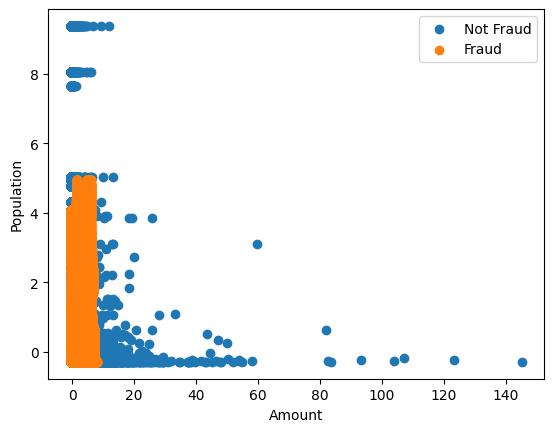

In [86]:
plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"], label = "Not Fraud")

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"], label = "Fraud")
#plt.legend(["Fraud", "Not Fraud"])
plt.legend()
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [75]:
# Try to fix the graph
# Convert X_train to dataframe and rename 
smote_X_rename = pd.DataFrame(smote_X)
smote_X_rename

smote_X_rename.columns = X.columns

In [77]:
raw_temp = pd.concat([smote_X_rename, smote_y], axis =1)


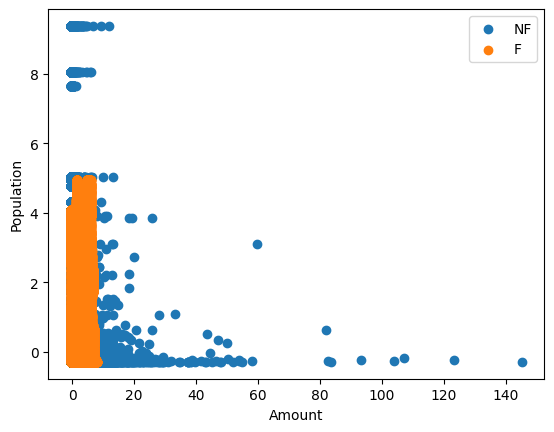

In [87]:
plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"], label = "NF")

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"], label = "F")
#plt.legend([ "Not Fraud", "Fraud"])
plt.legend()
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [32]:
resampling_methods = {
    "over": RandomOverSampler(),
    'under': RandomUnderSampler(),
    "smote": SMOTE()
}

model_configs = {
    'LOG': LogisticRegression(),
    'LASSO': LogisticRegression(penalty = 'l1', C = 2., solver = 'liblinear'),
    'DecisionTree': DecisionTreeClassifier()
}

In [42]:
def calc_perf_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    sensitiivity = tp / (tp + fn)
    specificity = tn / (tp + fn)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return(sensitiivity, specificity, precision, recall, f1)

In [43]:
trained_models = {}
results = []

In [44]:
for resample_key, resampler in resampling_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train,y_train)

    for model_key, model in model_configs.items():
        combined_key = f'{resample_key}_{model_key}'

        m = model.fit(resample_X, resample_y)

        trained_models[combined_key] = m

        y_pred = m.predict(X_test)

        sensitiivity, specificity, precision, recall, f1 = calc_perf_metrics(y_test, y_pred)

        results.append({"Model" : combined_key,
                        "Sensitivity": sensitiivity,
                        "Specificity": specificity, 
                        "Precision": precision,
                        "Recall": recall,
                        "F1": f1})

In [45]:
result_df = pd.DataFrame(results)

In [46]:
result_df

,Model,Sensitivity,Specificity,Precision,Recall,F1
0,over_LOG,0.747634,239.823344,0.032672,0.747634,0.062607
1,over_LASSO,0.747634,239.826498,0.032676,0.747634,0.062616
2,over_DecisionTree,0.520505,261.539432,0.553691,0.520505,0.536585
3,under_LOG,0.747634,231.359621,0.023850,0.747634,0.046226
4,under_LASSO,0.747634,231.239748,0.023759,0.747634,0.046055
5,under_DecisionTree,0.936909,247.384858,0.060403,0.936909,0.113489
6,smote_LOG,0.747634,239.574132,0.032320,0.747634,0.061961
7,smote_LASSO,0.747634,239.574132,0.032320,0.747634,0.061961
8,smote_DecisionTree,0.712934,260.072555,0.274272,0.712934,0.396144
